In [ ]:
!pip3 install yfinance

In [ ]:
!pip3 install ta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import yfinance as yf

from ta.trend import sma_indicator, ema_indicator

In [2]:
ticker="TSLA"

In [3]:
fillna=False
msft = yf.Ticker(ticker)
df_ticker = msft.history(period="max")

sma_days=9
df_ticker[f'trend_sma_{sma_days}'] = sma_indicator(close=df_ticker['Close'], window=sma_days, fillna=fillna)
sma_days=20
df_ticker[f'trend_sma_{sma_days}'] = sma_indicator(close=df_ticker['Close'], window=sma_days, fillna=fillna)
sma_days=50
df_ticker[f'trend_sma_{sma_days}'] = sma_indicator(close=df_ticker['Close'], window=sma_days, fillna=fillna)
sma_days=200
df_ticker[f'trend_sma_{sma_days}'] = sma_indicator(close=df_ticker['Close'], window=sma_days, fillna=fillna)

ema_days=9
df_ticker[f'trend_ema_{ema_days}'] = ema_indicator(close=df_ticker['Close'], window=ema_days, fillna=fillna)
ema_days=20
df_ticker[f'trend_ema_{ema_days}'] = ema_indicator(close=df_ticker['Close'], window=ema_days, fillna=fillna)
ema_days=50
df_ticker[f'trend_ema_{ema_days}'] = ema_indicator(close=df_ticker['Close'], window=ema_days, fillna=fillna)
ema_days=200
df_ticker[f'trend_ema_{ema_days}'] = ema_indicator(close=df_ticker['Close'], window=ema_days, fillna=fillna)

In [9]:
df_ticker=df_ticker.loc['2012':]

In [10]:
df_ticker.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,trend_sma_9,trend_sma_20,trend_sma_50,trend_sma_200,trend_ema_9,trend_ema_20,trend_ema_50,trend_ema_200
Date,,,,,,,,,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0,0.0,1.878444,1.972533,2.042867,1.830740,1.897822,1.948267,1.973026,1.847131
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0,0.0,1.877037,1.950167,2.042440,1.832400,1.887724,1.938654,1.968097,1.847133
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0,0.0,1.873704,1.924333,2.040533,1.834043,1.871779,1.926211,1.961818,1.846744
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0,0.0,1.867333,1.900067,2.038747,1.835610,1.856223,1.913619,1.955237,1.846219
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0,0.0,1.862519,1.887933,2.037773,1.837250,1.848312,1.904386,1.949803,1.845925


In [11]:
df1 = df_ticker.copy()
df2 = df_ticker.shift(1)

In [12]:
#df_2 - df_1
df21 = (df1 - df2)
#df.dropna()

In [13]:
temp=[
    df21['trend_sma_9'] > 0,
    df21['trend_ema_9'] > 0,
    df21['trend_sma_20'] > 0,
    df21['trend_ema_20'] > 0,
    df21['trend_sma_50'] > 0,
    df21['trend_ema_50'] > 0,
    df21['trend_sma_200'] > 0,
    df21['trend_ema_200'] > 0,
    ((df1['trend_sma_9'] <= df1['trend_ema_9']) & (df2['trend_sma_9'] >= df2['trend_ema_9'])),
    ((df1['trend_ema_9'] <= df1['trend_sma_9']) & (df2['trend_ema_9'] >= df2['trend_sma_9'])),
    ((df1['trend_sma_20'] <= df1['trend_ema_20']) & (df2['trend_sma_20'] >= df2['trend_ema_20'])),
    ((df1['trend_ema_20'] <= df1['trend_sma_20']) & (df2['trend_ema_20'] >= df2['trend_sma_20'])),
    ((df1['trend_sma_50'] <= df1['trend_ema_50']) & (df2['trend_sma_50'] >= df2['trend_ema_50'])),
    ((df1['trend_ema_50'] <= df1['trend_sma_50']) & (df2['trend_ema_50'] >= df2['trend_sma_50'])),
    ((df1['trend_sma_200'] <= df1['trend_ema_200']) & (df2['trend_sma_200'] >= df2['trend_ema_200'])),
    ((df1['trend_ema_200'] <= df1['trend_sma_200']) & (df2['trend_ema_200'] >= df2['trend_sma_200'])),
    
     ]

all_rules = np.array(temp).T

all_rules.shape

(2809, 16)

In [18]:
cols=['T', 'Buy date', 'Buy price', 'Sell date',  'Sell price', 'Profit Ratio']
def fitness_func(sol, sol_idx, generation_counter):
    sol=np.array(sol)
    
    df=pd.DataFrame(columns=cols)

    all_profit = []
    current_day, buy_day, sell_day = 0, 0, 0
    conds = np.zeros(sol.shape[0]-1)
    trans_counter=0
    hold_days = 0
    for ele in sol[-4:].astype(dtype=int):
        hold_days = (hold_days << 1) | ele
    
    # print(hold_days, sol[-4:])
    hold_days+=1
        
    counter=0
    while current_day < df1.shape[0]:
        counter+=1
        if current_day+hold_days >= df1.shape[0]:
            break
            
        conds = all_rules[current_day].astype(dtype=int) ^ sol[:-4].astype(dtype=int)
        if sum(conds)==0:
            if buy_day==0: #if the buy signal is seen and buy hasn't been initialized
                trans_counter+=1
                buy_day=current_day
                buy_price=df1.iloc[buy_day+1]['Open']
                buy_date=df1.iloc[buy_day+1].name.strftime("%m/%d/%Y")
                
                current_day=int(hold_days+buy_day)
                sell_day=current_day
                sell_price=df1.iloc[sell_day]['Close']
                sell_date=df1.iloc[sell_day].name.strftime("%m/%d/%Y")
                
                profit=(sell_price-buy_price)/buy_price
                all_profit.append(profit)
                new_row=[f'T{trans_counter}', buy_date, buy_price, sell_date, sell_price, profit]
                new_df=pd.DataFrame([new_row], columns=cols)
                df=pd.concat([df, new_df], ignore_index=True)
                buy_day=0
        else:
            current_day+=1
        conds = np.zeros(sol.shape[0]-1)
    
    if len(all_profit) > 0:
        fitness_val = np.mean(all_profit)
        """if fitness_val > best_gen_fitness_val:
            new_row=[f'Sum', '', '', '', '', fitness_val]
            new_df=pd.DataFrame([new_row], columns=cols)
            df=pd.concat([df, new_df], ignore_index=True)
            df.to_csv(f"./outputs/gen{generation_counter}_sol{sol_idx}_transactions.csv", index=False)
            np.save(f"./outputs/gen{generation_counter}_sol{sol_idx}_rules", sol)
            best_gen_fitness_val=fitness_val"""
        return fitness_val, df
    else:
        return 0.0, df

In [19]:
# bits
n_bits = all_rules.shape[1]+4
os.mkdir(f"outputs")

In [20]:
from tqdm import tqdm
def exhaustive_search(objective, n_bits):
    # enumerate generations
    binary_format=f'0{n_bits}b'
    n_iter=2**n_bits
    all_evals=np.zeros(n_iter)
    for gen in tqdm(range(n_iter)):
        sol=np.array(list(format(gen, binary_format))).astype(int)
        # evaluate all candidates in the population
        obj_val, df=objective(sol, 0, gen)
        all_evals[gen]=obj_val
        # save it to output
        new_row=['Sum', '', '', '', '', obj_val]
        new_df=pd.DataFrame([new_row], columns=cols)
        df=pd.concat([df, new_df], ignore_index=True)
        df.to_csv(f"./outputs/sol{gen}_transactions.csv", index=False)
        np.save(f"./outputs/sol{gen}_rules", sol)
    return all_evals

In [21]:
# perform the genetic algorithm search
all_scores = exhaustive_search(fitness_func, n_bits)
print('Done!')

  1%|▋                                                                       | 9986/1048576 [06:02<10:27:40, 27.58it/s]


KeyboardInterrupt: 

In [ ]:
sorted_scores_idx=np.argsort(all_scores)[::-1]
sorted_scores=all_scores[sorted_scores_idx]
print(f'The best solution is ranked below')
for i in range(0, len(all_scores)):
    print(f'sol{sorted_scores_idx[i]}, objective value={sorted_scores[i]}')

In [51]:
plt.plot(all_scores)
plt.xlabel("generation")
plt.ylabel("average of profit")
plt.title(f"{ticker} stock")

NameError: name 'all_scores' is not defined

In [15]:
# define the total iterations
n_iter = 1000
# bits
n_bits = all_rules.shape[1]+4
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
os.mkdir(f"{n_iter}generation-outputs")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '1000generation-outputs'

In [17]:
# perform the genetic algorithm search
best, score, all_scores = genetic_algorithm(fitness_func, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>15, new best f([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]) = 0.122
>44, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]) = 0.246
>45, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]) = 0.259
>46, new best f([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]) = 0.382
>126, new best f([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]) = 0.394
>148, new best f([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]) = 0.423
>148, new best f([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]) = 0.444
>149, new best f([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]) = 0.562
>702, new best f([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) = 0.721
Done!
f([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) = 0.720718


Text(0.5, 1.0, 'TSLA stock')

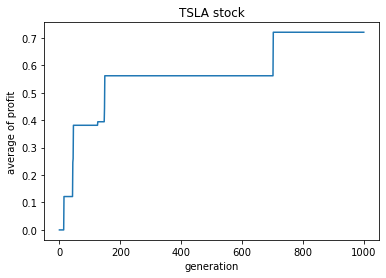

In [18]:
plt.plot(all_scores)
plt.xlabel("generation")
plt.ylabel("average of profit")
plt.title(f"{ticker} stock")